# Import File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'data_test_task_2022.xlsx'

In [3]:
df = pd.read_excel(path)

In [4]:
df.isnull().sum()

record_id                0
service_date             0
service_name             0
service_amount           0
service_number           0
insured                  0
sex_id                  21
age_for_service_date     0
dtype: int64

**-----------------------------------------------------------**
### data description

- record_id- уникальный идентификатор строки данных
- service_date - дата оказания медицинской услуги
- service_name - наименование медицинской услуги
- service_number - количество услуг
- service_amount - сумма выплат (стоимость оказанных услуг в рублях)
- insured - уникальный идентификатор пациента
- sex_id - пол пациента
- age_for_service_date - возраст пациента


**---------------------------------------------------------------**

### Hypothesis
**Гипотезы для проверки, приблизительный список:**

1. Средняя стоимость обслуживания пациентов изменилась из-за изменения цен на услуги
2. Средняя стоимость обслуживания изменилась из-за изменения интенсивности лечения пациентов
3. Средняя стоимость обслуживания пациентов изменилась из-за изменения поло-возрастной структуры обслуживаемых пациентов
4. Средняя стоимость обслуживания пациентов изменилась из-за изменения структуры оказываемых услуг (раньше были дорогие услуги, теперь дешевые или наоборот)
5. Средняя стоимость обслуживания изменилась из-за изменения среднего количества оказанных услуг на один кейс
6. Другие гипотезы на усмотрение кандидата

Кандидат должен выдвинуть и проверить от 3-х до 6-ти основных гипотез. Проверка каждой гипотезы должна содержать:

- Формулировку гипотезы
- Описание (определение) показателей, которые требуется рассчитать для проверки гипотезы
- Расчет выбранных показателей на доступных данных
- Вывод о подтверждении или опровержении гипотезы на основе данных и расчет влияния данного фактора на повышение средней стоимости

**---------------------------------------------------------------**
 
### Задание

Требуется провести анализ изменения цены лечения в 2022 году относительно 2021 года в медицинской клинике и определить ключевые драйверы изменения цены лечения. 

**Определение:** Медицинский кейс - последовательность медицинских услуг, полученных одним застрахованном в одной клинике с интервалом между любыми соседними по дате услугами не более 14 дней. Т.е. между любыми 2-мя соседними услугами в кейсе не должно быть разрыва более 14 дней.

**Определение:** Визит - уникальное сочетание даты оказания услуги, застрахованного. Т.е. один визит - это один день, в который застрахованный побывал в клинике. Если был в одной клинике 2 раза, но в разные дни, то это два визита. Если получал услуги (в любом количестве) в одной клинике в один день, то это один визит.

**Определение:** Обратившийся в месяц - уникальное сочетание месяца оказания услуги и идентификатора пациента

In [5]:
df

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26
...,...,...,...,...,...,...,...,...
85364,33178146803,2022-08-20,Общий анализ мочи,495,1,935341,2.0,30
85365,33178146903,2022-08-20,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",800,1,935341,2.0,30
85366,33178147003,2022-08-20,АЧТВ (активированное частичное тромбопластинов...,300,1,935341,2.0,30
85367,33178147103,2022-08-20,Протромбин (МНО),410,1,935341,2.0,30


In [6]:
df.drop(columns=['record_id'], axis=1, inplace=True)

# Notebook information

### [Feature Enginering](#feat)
- In this section we add new columns such as visit , year , year_month to make it easier to analyse the data 
- В этом разделе мы добавим новые столбцы, такие как visit, year, year_month, чтобы было проще анализировать данные. 

### [EDA ( Hypothesis testing )](#eda)
- In this section we test hypotheses, look for anomalies and reject or accept hypotheses.
- В этом разделе мы проверяем гипотезы, ищем аномалии, отвергаем или принимаем гипотезы.

### [Сonclusion ](#con)
- In this section you can see and read the analysed hypotheses and why some hypotheses can be rejected or accepted.
- В этом разделе вы можете увидеть и прочитать, как анализируются гипотезы и почему те или иные гипотезы могут быть отвергнуты или приняты.

**Recommend going straight to this section of the analysis**


**Рекомендуем сразу перейти к этому разделу анализа**

<a id="feat"></a>
#  Feature Enginering

In [7]:
df['service_date'].value_counts()

service_date
2022-05-24    344
2022-06-08    333
2022-05-11    314
2022-06-06    307
2022-06-01    306
             ... 
2021-01-11     43
2021-02-14     42
2021-01-10     40
2021-02-21     37
2021-12-31     29
Name: count, Length: 602, dtype: int64

In [8]:
df['age_for_service_date'].unique()

array([26, 25, 40, 35, 43, 48, 36,  2, 30,  1, 44, 32,  0, 28, 34,  4, 37,
       33, 38, 49, 45, 39, 51, 31, 23, 24, 27, 16,  5, 13, 42, 11, 29, 21,
        3, 65, 60,  6, 55, 68, 52, 47, 58,  8, 22, 50, 63,  7, 53, 62, 46,
       56,  9, 41, 61, 57, 14, 54, 10, 15, 18, 19, 12, 59, 17, 67, 83, 64,
       72, 20, 70, 66, 74, 75, 71, 69])

In [9]:
df['service_date'] = pd.to_datetime(df['service_date'])

df['year'] = df['service_date'].dt.year

df['year_month'] = df['service_date'].dt.to_period('M')

In [10]:
df = df[(df['year'] == 2021) | (df['year'] == 2022)]

df = df.sort_values(by=['insured', 'service_date'])

df['prev_date'] = df.groupby('insured')['service_date'].shift(1)
df['days_between'] = (df['service_date'] - df['prev_date']).dt.days

df['new_case'] = df['days_between'] > 14
df['medical_case'] = df.groupby('insured')['new_case'].cumsum()

df['visit'] = df.groupby(['insured', 'service_date']).ngroup()
df['visit'] = df['visit'] + 1

df['obratilis_v_mesiac'] = df.groupby(['insured', 'year_month']).ngroup()

average_cost_2021 = df[df['year'] == 2021].groupby('medical_case')['service_amount'].sum().mean()
average_cost_2022 = df[df['year'] == 2022].groupby('medical_case')['service_amount'].sum().mean()

cost_comparison = {
    "Average cost per medical case in 2021": average_cost_2021,
    "Average cost per medical case in 2022": average_cost_2022,
    "Difference": average_cost_2022 - average_cost_2021
}

cost_comparison

{'Average cost per medical case in 2021': 5056167.1,
 'Average cost per medical case in 2022': 3265777.466666667,
 'Difference': -1790389.6333333328}

In [11]:
df

,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,year,year_month,prev_date,days_between,new_case,medical_case,visit,obratilis_v_mesiac
602,2021-01-11,Прием первичный,1470,1,125073,2.0,65,2021,2021-01,NaT,NaN,False,0,1,0
603,2021-01-11,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,125073,2.0,65,2021,2021-01,2021-01-11,0.0,False,0,1,0
604,2021-01-11,Взятие крови из периферической вены,158,1,125073,2.0,65,2021,2021-01,2021-01-11,0.0,False,0,1,0
605,2021-01-16,Рентгенография органов грудной клетки ( 2 прое...,1827,1,125073,2.0,65,2021,2021-01,2021-01-11,5.0,False,0,2,0
606,2021-01-17,Прием повторный,1313,1,125073,2.0,65,2021,2021-01,2021-01-16,1.0,False,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83617,2022-08-24,Ультразвуковое исследование мочевого пузыря,1820,1,1306795,1.0,31,2022,2022-08,2022-08-24,0.0,False,0,30291,10735
83618,2022-08-24,"Прием уролога, повторный",1450,1,1306795,1.0,31,2022,2022-08,2022-08-24,0.0,False,0,30291,10735
83619,2022-08-27,Эхокардиография с допплеровским анализом,4000,1,1306795,1.0,31,2022,2022-08,2022-08-24,3.0,False,0,30292,10735
83620,2022-08-28,"Прием кардиолога, повторный",1450,1,1306795,1.0,31,2022,2022-08,2022-08-27,1.0,False,0,30293,10735


Определение: Медицинский кейс - последовательность медицинских услуг, полученных одним застрахованном в одной клинике с интервалом между любыми соседними по дате услугами не более 14 дней. Т.е. между любыми 2-мя соседними услугами в кейсе не должно быть разрыва более 14 дней.

Определение: Визит - уникальное сочетание даты оказания услуги, застрахованного. Т.е. один визит - это один день, в который застрахованный побывал в клинике. Если был в одной клинике 2 раза, но в разные дни, то это два визита. Если получал услуги (в любом количестве) в одной клинике в один день, то это один визит.

Определение: Обратившийся в месяц - уникальное сочетание месяца оказания услуги и идентификатора пациента

<a id="eda"></a>
# EDA ( Hypothesis testing )

- Средняя стоимость обслуживания пациентов изменилась из-за изменения цен на услуги
- Средняя стоимость обслуживания изменилась из-за изменения интенсивности лечения пациентов
- Средняя стоимость обслуживания пациентов изменилась из-за изменения поло-возрастной структуры обслуживаемых пациентов
- Средняя стоимость обслуживания пациентов изменилась из-за изменения структуры оказываемых услуг (раньше были дорогие услуги, теперь дешевые или наоборот)
- Средняя стоимость обслуживания изменилась из-за изменения среднего количества оказанных услуг на один кейс


## First Hypothesis

### Средняя стоимость обслуживания пациентов изменилась из-за изменения цен на услуги 

import matplotlib.pyplot as plt

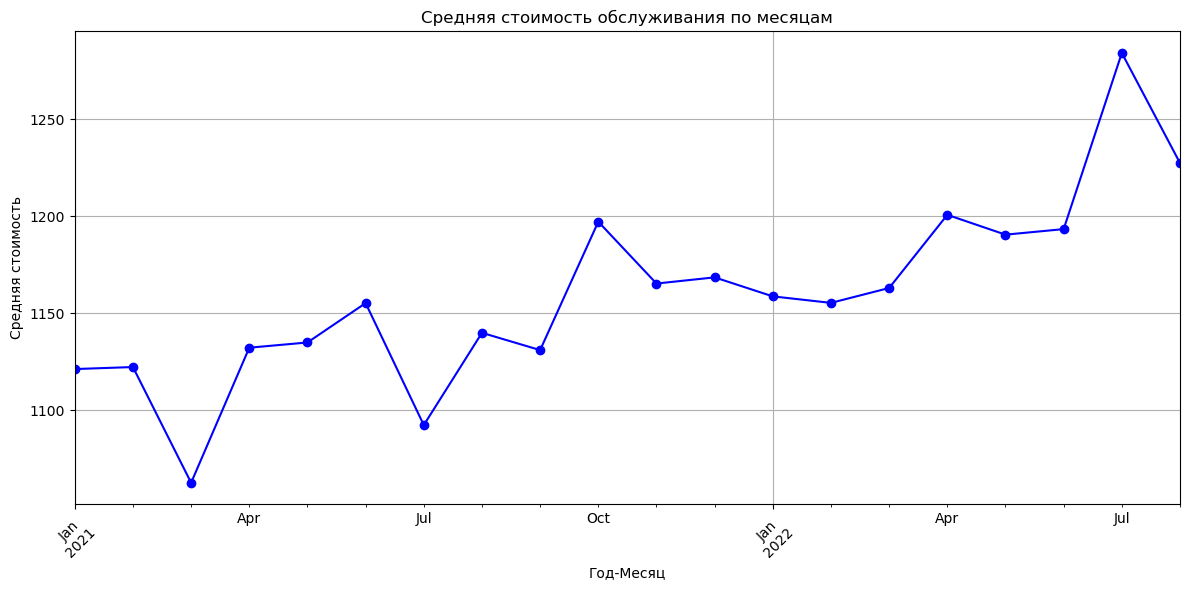

In [12]:
avg_service_cost = df.groupby('year_month')['service_amount'].mean()

plt.figure(figsize=(12, 6))
avg_service_cost.plot(marker='o', linestyle='-', color='b')
plt.title('Средняя стоимость обслуживания по месяцам')
plt.xlabel('Год-Месяц')
plt.ylabel('Средняя стоимость')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Мы видим что цены на Январь 2021 значительно ниже чем Январь 2022

## Возможные причины : 

- появились новые услуги 
- некоторые услиги стали дороже 

- Новые Услуги: Некоторые услуги, такие как аллергопанели IgE различных видов, начали предоставляться с февраля 2022 года. Это может указывать на то, что добавление новых, возможно более дорогих услуг, могло повлиять на увеличение средней стоимости обслуживания.

- Изменение Частоты Предоставления Услуг: Наблюдается изменение в частоте проведения некоторых процедур, например, эхокардиографии с допплеровским анализом. Количество таких процедур увеличилось в 2022 году по сравнению с предыдущим годом.

- Сезонные Колебания: В некоторых услугах, как видно из данных, есть сезонность в их предоставлении, что также может влиять на месячные колебания средней стоимости.

In [13]:
service_counts = df.groupby(['year_month', 'service_name']).size().unstack(fill_value=0)
service_counts

service_name,"(1 E)Аллергопанель IgE (Молоко коровье, Молоко козье, Молоко овечье,Сыр, Творог,Сметана, Йогурт, Кефир )","(2 E)Аллергопанель IgE (Пшеничная мука, Ржаная мука, Рис, Гречка, Овес, Перловка, Пшено, Ячменнная крупа )","(3 E)Аллергопанель IgE (Фасоль (бобы), Горох, Чечевица (смесь), Кукуруза, Дрожжи пекарские, Белок куриного яйца, Желток куриного яйца, Яйцо перепелиное)","(4 E)Аллергопанель IgE (Говядина, Телятина, Свинина, Баранина, Курица, Индейка, Утка, Гусь)","(Б1 (11))Аллергопанель IgE шерсть кошки, шерсть собаки, шерсть овцы, клещ D,pteroniss, клещ D.farina, пыль домашняя, перо подушки, библиотечная пыль)",17-OH - гидроксипрогестерон,25-OH витамин D (25-гидроксихолекальциферол),Ascaris IgG,Bordetella (pertusis) IgA,Bordetella (pertusis) IgG,...,Эпителий лошади,Эпителий морской свинки,Эпителий мыши,Эпителий собаки,Эстрадиол,Эхокардиография с допплеровским анализом,Эхоэнцефалография,альфа-амилаза,бета-ХГЧ (бета-хорионический гонадотропин),"гистерорезектоскопия при полипах , РДВ"
year_month,,,,,,,,,,,,,,,,,,,,,
2021-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7,0,3,0,0
2021-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,12,1,2,0,0
2021-03,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,8,0,1,1,0
2021-04,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,12,2,1,0,0
2021-05,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,2,12,0,0,1,0
2021-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,15,0,0,1,1
2021-07,0,0,0,0,2,0,3,0,0,0,...,1,0,0,1,1,14,0,0,0,0
2021-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,20,0,1,1,0
2021-09,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,15,0,1,0,0


In [14]:
avg_cost_per_service = df.groupby(['year_month', 'service_name'])['service_amount'].mean().unstack()
avg_cost_per_service.head(1)

service_name,"(1 E)Аллергопанель IgE (Молоко коровье, Молоко козье, Молоко овечье,Сыр, Творог,Сметана, Йогурт, Кефир )","(2 E)Аллергопанель IgE (Пшеничная мука, Ржаная мука, Рис, Гречка, Овес, Перловка, Пшено, Ячменнная крупа )","(3 E)Аллергопанель IgE (Фасоль (бобы), Горох, Чечевица (смесь), Кукуруза, Дрожжи пекарские, Белок куриного яйца, Желток куриного яйца, Яйцо перепелиное)","(4 E)Аллергопанель IgE (Говядина, Телятина, Свинина, Баранина, Курица, Индейка, Утка, Гусь)","(Б1 (11))Аллергопанель IgE шерсть кошки, шерсть собаки, шерсть овцы, клещ D,pteroniss, клещ D.farina, пыль домашняя, перо подушки, библиотечная пыль)",17-OH - гидроксипрогестерон,25-OH витамин D (25-гидроксихолекальциферол),Ascaris IgG,Bordetella (pertusis) IgA,Bordetella (pertusis) IgG,...,Эпителий лошади,Эпителий морской свинки,Эпителий мыши,Эпителий собаки,Эстрадиол,Эхокардиография с допплеровским анализом,Эхоэнцефалография,альфа-амилаза,бета-ХГЧ (бета-хорионический гонадотропин),"гистерорезектоскопия при полипах , РДВ"
year_month,,,,,,,,,,,,,,,,,,,,,
2021-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3465.0,NaN,287.0,NaN,NaN


In [15]:
max_cost_change = avg_cost_per_service.apply(lambda x: (x.max() - x.min()) / x.min() if x.min() > 0 else None, axis=0)
significant_cost_changes = max_cost_change[max_cost_change > 0.7]

max_count_change = service_counts.apply(lambda x: (x.max() - x.min()) / x.min() if x.min() > 0 else None, axis=0)
significant_count_changes = max_count_change[max_count_change > 0.7]

filtered_avg_cost = avg_cost_per_service[significant_cost_changes.index]
filtered_service_counts = service_counts[significant_count_changes.index]

filtered_avg_cost.head(1)

service_name,Блокада (без стоимости препарата),Блокада эндоназальная,"В,в инъекция (за 1 процедуру без стоимости лекарств)",Введение лекарственных препаратов в наружный слуховой проход,Взятие материала для цитологического исследования,"Взятие материала на посев, цитологическое исследование ( риноцитограмма)",Взятие соскоба на морфологическое исследование,Взятие соскоба с ногтевых пластинок и гладкой кожи на патогенные грибы,Вскрытие абсцедирующего фурункула,Вскрытие абсцесса различной локализации,...,"Рентгенография ребер, грудины (2 снимка)","Сеанс SIS терапии, длинный цикл, 1 зона",Туалет слухового прохода,УЗИ - контроль при пункции,"Удаление папиллом, бородавок и др, радиохирургическим ножом на теле (1 шт. размером до 5 мм.)","Удаление радиохирургическим ножом беспигментного невуса свыше 0,5 см",Ударно-волновая терапия (1 сеанс),Ультразвуковое исследование сустава,Хирургическая обработка раны без наложения швов,Электронейромиография - игольчатая миография второй (каждой последующей) мышцы
year_month,,,,,,,,,,,,,,,,,,,,,
2021-01,NaN,NaN,NaN,NaN,426.0,284.0,NaN,164.0,NaN,6405.0,...,NaN,NaN,515.0,NaN,NaN,NaN,NaN,1890.0,NaN,NaN


In [16]:
filtered_service_counts.head(1)

service_name,Chlamydia trachomatis (Соскоб),АЛТ (аланинаминотрансфераза),АСТ (аспартатаминотрансфераза),Альфа-амилаза панкреатическая,Анемизация слизистой носа,Аноскопия,Билирубин общий,Билирубин прямой,"В,мышечная инъекция (за 1 процедуру без стоимости лекарств)",Взятие крови из периферической вены,...,Ультразвуковое исследование сустава,Урологический мазок,Установка и снятие носителя аппарата Холтеровского мониторирования АД,Установка и снятие носителя аппарата Холтеровского мониторирования ЭКГ,Фонофорез (1 сеанс) (1 поле),Фосфотаза щелочная,Функция внешнего дыхания,Холестерин,Эзофагогастродуоденоскопия,Эхокардиография с допплеровским анализом
year_month,,,,,,,,,,,,,,,,,,,,,
2021-01,1,11,11,2,15,3,10,5,8,93,...,1,5,3,6,21,2,3,7,11,7


In [17]:
price_comparison_full = df.groupby(['service_name', 'year'])['service_amount'].mean().unstack()
price_comparison_full['price_change'] = price_comparison_full[2022] - price_comparison_full[2021]

top_10_price_changes = price_comparison_full[['price_change']].abs().sort_values(by='price_change', ascending=False).head(10)


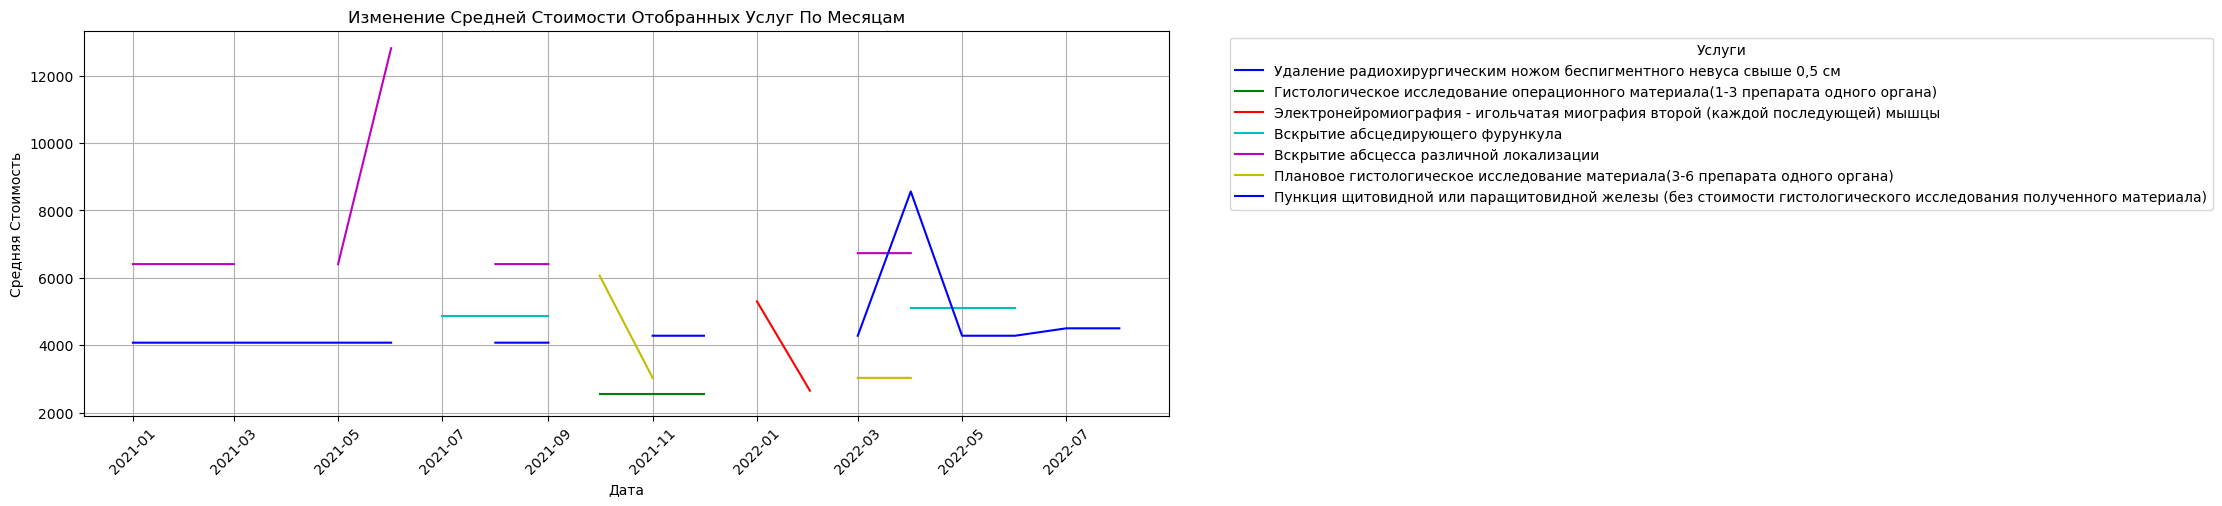

In [18]:
from itertools import cycle

colors = cycle(['b', 'g', 'r', 'c', 'm', 'y'])

top_services = filtered_avg_cost.std().nlargest(7).index  

if not filtered_avg_cost.empty and not top_services.empty:
    fig, ax = plt.subplots(figsize=(14, 5))
    for service in top_services:
        if service in filtered_avg_cost:
            ax.plot(filtered_avg_cost.index.to_timestamp(), filtered_avg_cost[service], label=service, color=next(colors))
    
    ax.set_title('Изменение Средней Стоимости Отобранных Услуг По Месяцам')
    ax.set_xlabel('Дата')
    ax.set_ylabel('Средняя Стоимость')
    ax.legend(title='Услуги', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True)
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Нет данных для отображения или услуги не выбраны.")


## Second Hypothesis

* Средняя стоимость обслуживания изменилась из-за изменения интенсивности лечения пациентов
- The average cost of care has changed due to changes in the intensity of patient care

In [19]:
max_visits_2021 = df[df['year'] == 2021].groupby('insured')['visit'].max()

df = df.merge(max_visits_2021.rename('max_visit2021'), on='insured', how='left')

df.head(1)

,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,year,year_month,prev_date,days_between,new_case,medical_case,visit,obratilis_v_mesiac,max_visit2021
0,2021-01-11,Прием первичный,1470,1,125073,2.0,65,2021,2021-01,NaT,NaN,False,0,1,0,15.0


In [20]:
max_visits_2022 = df[df['year'] == 2022].groupby('insured')['visit'].max()
df = df.merge(max_visits_2022.rename('max_visit2022'), on='insured', how='left')

df.head(1)

,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,year,year_month,prev_date,days_between,new_case,medical_case,visit,obratilis_v_mesiac,max_visit2021,max_visit2022
0,2021-01-11,Прием первичный,1470,1,125073,2.0,65,2021,2021-01,NaT,NaN,False,0,1,0,15.0,NaN


In [21]:
df['max_visit2021'].mode()

0    5240.0
Name: max_visit2021, dtype: float64

In [22]:
df['max_visit2022'].mode()

0    5285.0
Name: max_visit2022, dtype: float64

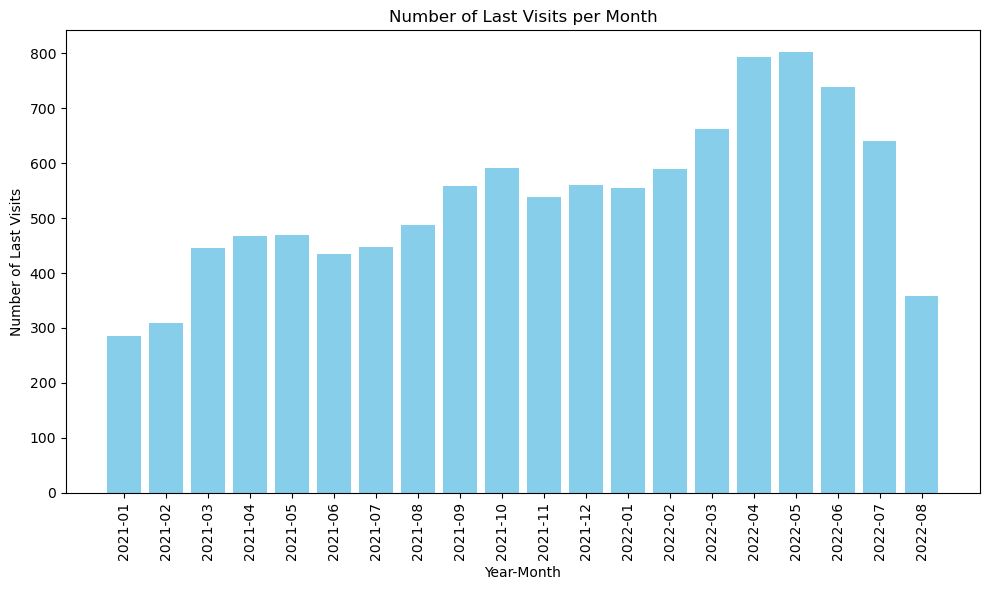

In [23]:
last_visits_per_month = df.groupby(['year_month', 'insured'])['visit'].max().reset_index()

visits_per_month = last_visits_per_month.groupby('year_month')['visit'].count().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(visits_per_month['year_month'].astype(str), visits_per_month['visit'], color='skyblue')

plt.xlabel('Year-Month')
plt.ylabel('Number of Last Visits')
plt.title('Number of Last Visits per Month')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Third Hypothesis

- Средняя стоимость обслуживания пациентов изменилась из-за изменения поло-возрастной структуры обслуживаемых пациентов

In [24]:
bins = [0, 18, 35, 50, 100]  
labels = ['<18', '18-35', '36-50', '50<'] 
df['age_group'] = pd.cut(df['age_for_service_date'], bins=bins, labels=labels, right=False)

df.head(1)

,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,year,year_month,prev_date,days_between,new_case,medical_case,visit,obratilis_v_mesiac,max_visit2021,max_visit2022,age_group
0,2021-01-11,Прием первичный,1470,1,125073,2.0,65,2021,2021-01,NaT,NaN,False,0,1,0,15.0,NaN,50<


In [25]:
grouped_data = df.groupby(['year', 'sex_id', 'age_group'])['service_amount'].sum()

In [26]:
grouped_data = pd.DataFrame(grouped_data)
grouped_data

service_amount
year sex_id age_group                
2021 1.0    <18               2059779
            18-35             8638109
            36-50             7853626
            50<               1435182
     2.0    <18               2386982
            18-35            13994289
            36-50            11157805
            50<               3013984
2022 1.0    <18               1688441
            18-35             8198438
            36-50             6758067
            50<               1415681
     2.0    <18               1579759
            18-35            13709893
            36-50            12916969
            50<               2719414

## Fourth hypothesis

Средняя стоимость обслуживания пациентов изменилась из-за изменения структуры оказываемых услуг (раньше были дорогие услуги, теперь дешевые или наоборот)

In [33]:
median_service_cost_2021 = df[df['year'] == 2021]['service_amount'].median()
df['service_category_2021'] = df.apply(lambda row: 'expensive' if row['service_amount'] > median_service_cost_2021 else 'cheap' if row['year'] == 2021 else None, axis=1)

median_service_cost_2022 = df[df['year'] == 2022]['service_amount'].median()
df['service_category_2022'] = df.apply(lambda row: 'expensive' if row['service_amount'] > median_service_cost_2022 else 'cheap' if row['year'] == 2022 else None, axis=1)


In [34]:
service_distribution_2021 = df[df['year'] == 2021].groupby('service_category_2021')['service_amount'].count().reset_index()

service_distribution_2022 = df[df['year'] == 2022].groupby('service_category_2022')['service_amount'].count().reset_index()

avg_service_cost_2021 = df[df['year'] == 2021].groupby('service_category_2021')['service_amount'].mean().reset_index()

avg_service_cost_2022 = df[df['year'] == 2022].groupby('service_category_2022')['service_amount'].mean().reset_index()


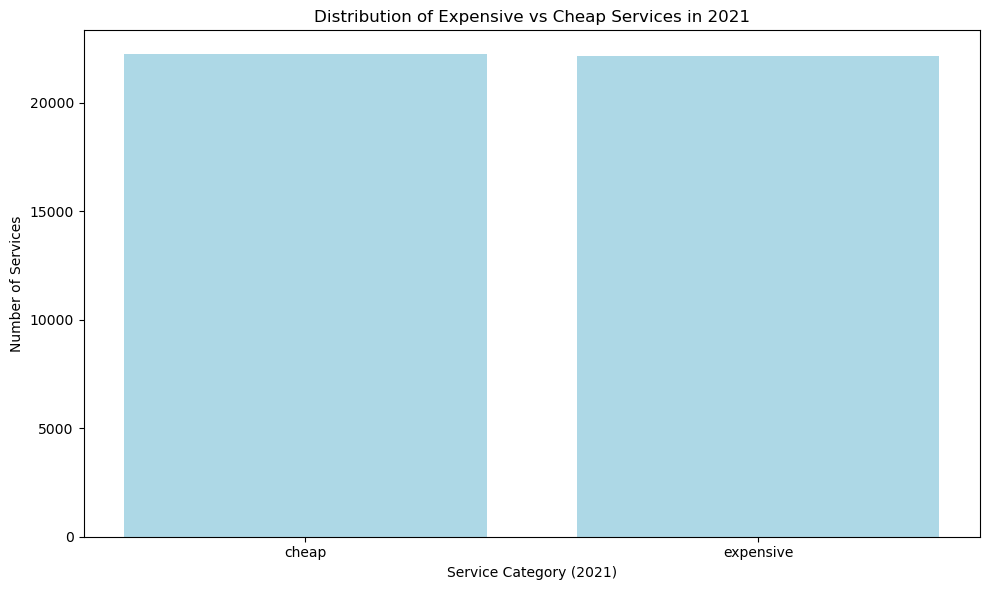

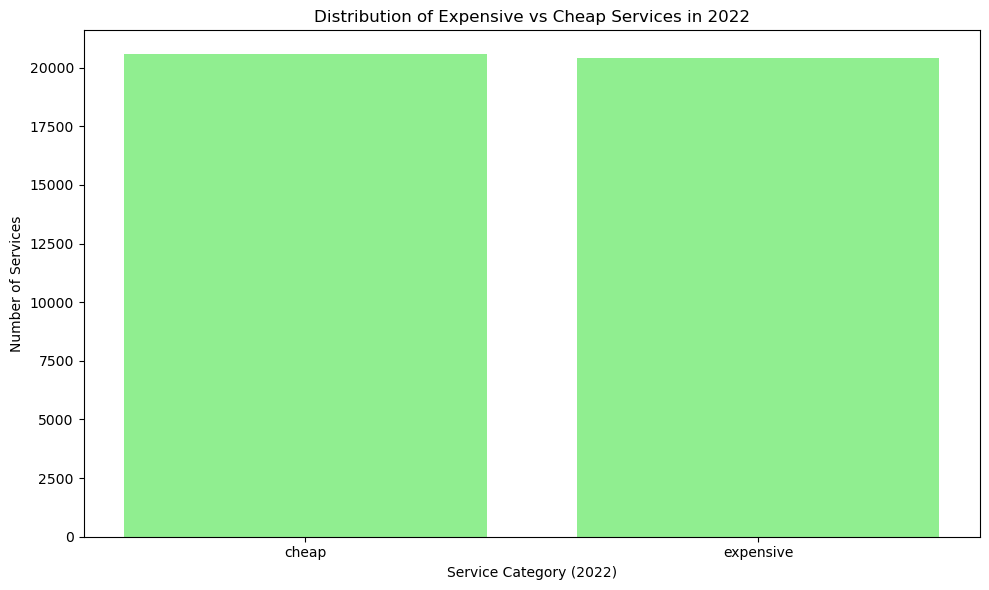

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(service_distribution_2021['service_category_2021'], service_distribution_2021['service_amount'], color='lightblue')
plt.xlabel('Service Category (2021)')
plt.ylabel('Number of Services')
plt.title('Distribution of Expensive vs Cheap Services in 2021')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(service_distribution_2022['service_category_2022'], service_distribution_2022['service_amount'], color='lightgreen')
plt.xlabel('Service Category (2022)')
plt.ylabel('Number of Services')
plt.title('Distribution of Expensive vs Cheap Services in 2022')
plt.tight_layout()
plt.show()


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
<a id="con"></a>
# Сonclusion 

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

## First hypothesis

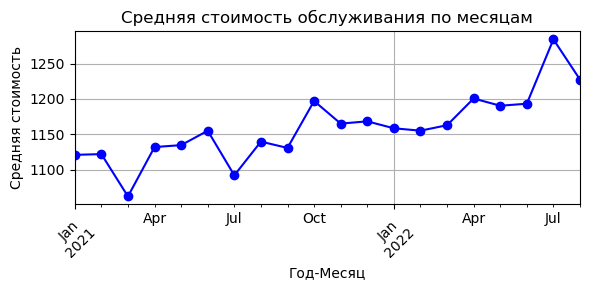

In [27]:
avg_service_cost = df.groupby('year_month')['service_amount'].mean()

plt.figure(figsize=(6, 3)) # Здесь можно изменить размер графика 
avg_service_cost.plot(marker='o', linestyle='-', color='b')
plt.title('Средняя стоимость обслуживания по месяцам')
plt.xlabel('Год-Месяц')
plt.ylabel('Средняя стоимость')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Что вы можете узнать из этого графика 

**Общая тенденция**:Средняя стоимость услуг варьируется, но к концу периода наблюдается подъем. В январе 2021 года стоимость была относительно низкой, затем последовали колебания.

**Колебания стоимости**:Стоимость колеблется, но примерно с октября 2021 года начинается постепенный рост, который достигает пика в июле 2022 года. Это может свидетельствовать об изменении ценовой политики, увеличении стоимости материалов или

Возможные причины : 

- появились новые услуги 
- некоторые услиги стали дороже 

**-----------------------------------------------------------------------------------------------------------**

What you can learn from this graph 

**General trend**:The average cost of services varies, but there is an uptick towards the end of the period. In January 2021, the cost was relatively low, followed by fluctuations.

**Cost fluctuations**:The cost fluctuates, but from about October 2021, a gradual rise begins, which peaks in July 2022. This may indicate a change in pricing policy, increase in the cost of materials or

Possible reasons : 

- new services have become available 
- some services have become more expensive 

### Появились новые услуги -- New services have become available 

In [28]:
services_2021 = service_counts.loc[service_counts.index < '2022-01-01'].sum()
services_2022 = service_counts.loc[service_counts.index >= '2022-01-01'].sum()
new_services_2022 = services_2022[(services_2022 > 0) & (services_2021 == 0)]

print("Услуги, которые появились только в 2022 году:")
pd.DataFrame(new_services_2022)


Услуги, которые появились только в 2022 году:


,0
service_name,
"(1 E)Аллергопанель IgE (Молоко коровье, Молоко козье, Молоко овечье,Сыр, Творог,Сметана, Йогурт, Кефир )",6
"(2 E)Аллергопанель IgE (Пшеничная мука, Ржаная мука, Рис, Гречка, Овес, Перловка, Пшено, Ячменнная крупа )",3
"(3 E)Аллергопанель IgE (Фасоль (бобы), Горох, Чечевица (смесь), Кукуруза, Дрожжи пекарские, Белок куриного яйца, Желток куриного яйца, Яйцо перепелиное)",1
"(4 E)Аллергопанель IgE (Говядина, Телятина, Свинина, Баранина, Курица, Индейка, Утка, Гусь)",2
Ascaris IgG,3
...,...
Экспресс-тест Грипп А и В,1
Эластотонометрия,1
"Эндоскопическая полипэктомия 1-й кат, ( до 0,5см )",2


In [29]:
new_services_2022.count()

136

- В 2023 году появление 136 новых услуг по сравнению с 2022 годом может значительно повлиять на среднюю цену услуг в различных секторах. 
- In 2023, the emergence of 136 new services compared to 2022 may significantly affect the average price of services in different sectors. 

### Некоторые услуги стали дороже-- Some services have become more expensive 

/var/folders/42/p0q84d257_3_jcg_60114l9w0000gn/T/ipykernel_5403/2221495525.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


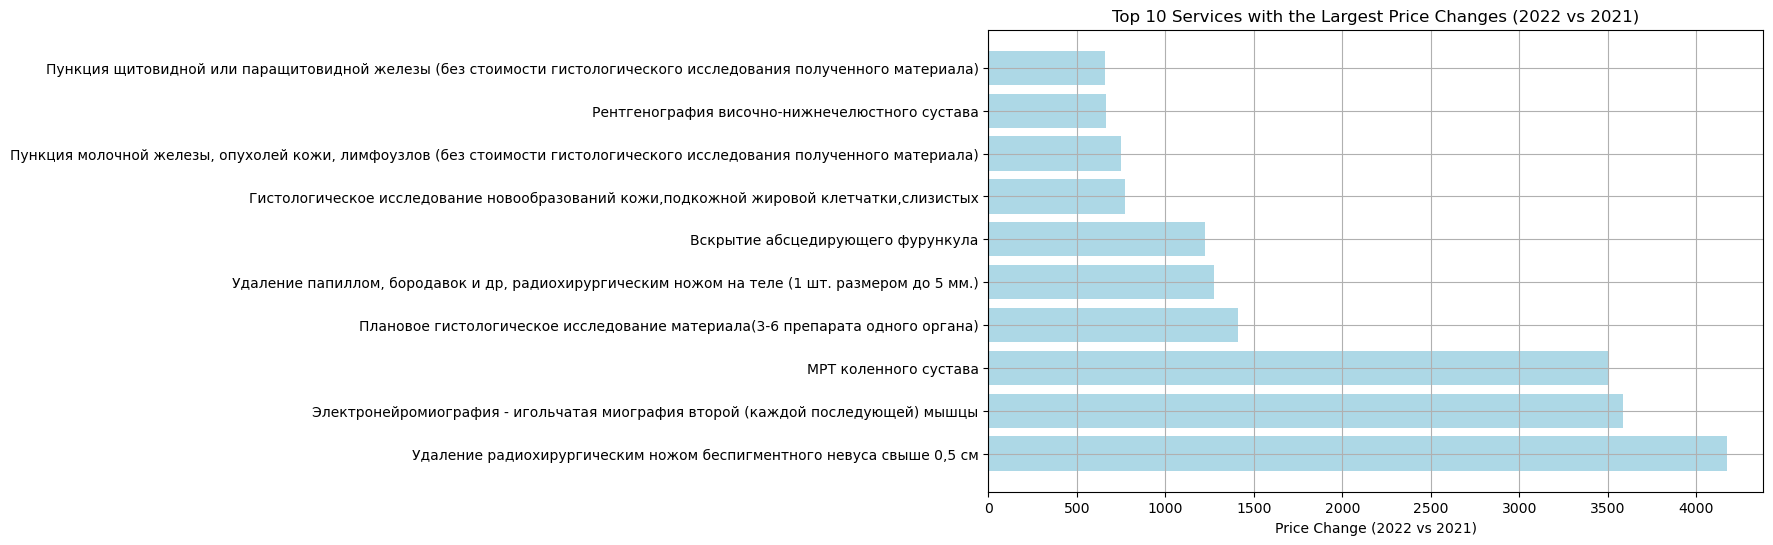

In [30]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_price_changes.index, top_10_price_changes['price_change'], color='lightblue')
plt.xlabel('Price Change (2022 vs 2021)')
plt.title('Top 10 Services with the Largest Price Changes (2022 vs 2021)')
plt.grid(True)

plt.tight_layout()
plt.show()


На графике видно, как изменились цены на различные медицинские услуги за один год. Особенно заметное увеличение цены наблюдается на услуги, связанные с диагностикой и хирургическими процедурами, что может быть связано с увеличением стоимости оборудования, материалов или специализированного обучения персонала.

The graph shows how prices for various medical services have changed over one year. Particularly noticeable price increases are observed for services related to diagnostics and surgical procedures, which may be due to an increase in the cost of equipment, materials or specialized staff training.

**Можно предполагать что первая гипотеза верна**

**We can assume that the first hypothesis is correct**

## Second hypothesis

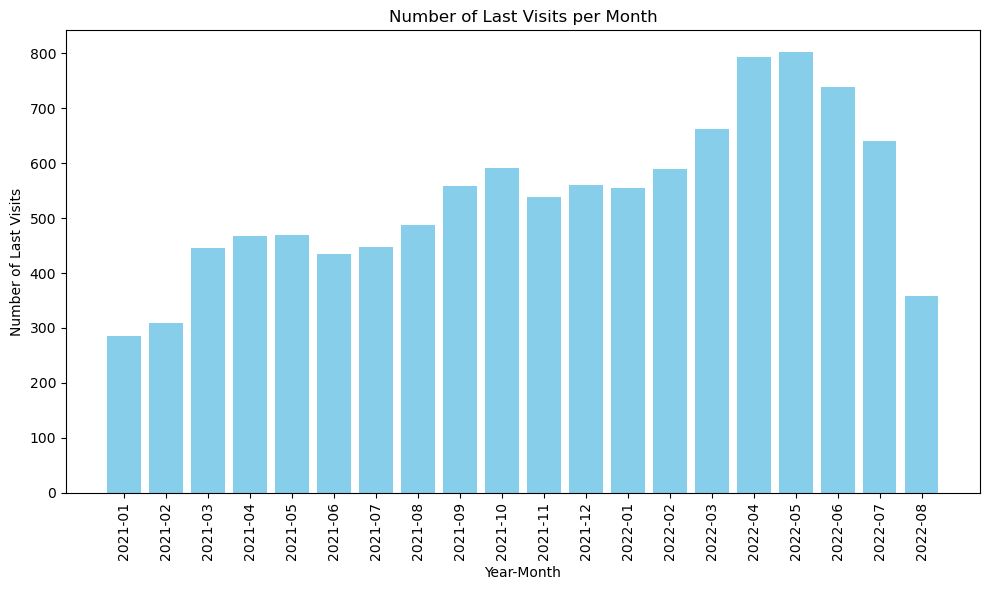

In [31]:
last_visits_per_month = df.groupby(['year_month', 'insured'])['visit'].max().reset_index()

visits_per_month = last_visits_per_month.groupby('year_month')['visit'].count().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(visits_per_month['year_month'].astype(str), visits_per_month['visit'], color='skyblue')

plt.xlabel('Year-Month')
plt.ylabel('Number of Last Visits')
plt.title('Number of Last Visits per Month')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Анализ графика : 
 - Из графика видно, что в 2022 году начиная с апреля по июнь количество визитов было высоким, но затем наблюдается значительное снижение в июле и августе. Это может свидетельствовать о сезонных факторах или снижении активности клиентов во второй половине года.
 
 Graph Analysis : 
 - The graph shows that in 2022 from April to June the number of visits was high but then there is a significant decline in July and August. This may indicate seasonal factors or decrease in customer activity in the second half of the year.

**За 2022 не хватает данных о последних 4 месяцев , но скорее всего можно предполагать что вторая  гипотеза тоже верна . Потому что если сравнивать первые 8 месяцев каждого года , то получается что количества визитов пациентов значительно увеличилось**

**For 2022 we lack data on the last 4 months, but we can probably assume that the second hypothesis is also true. Because if we compare the first 8 months of each year, it appears that the number of patient visits has increased significantly**.

## Third hypothesis

In [32]:
grouped_data

service_amount
year sex_id age_group                
2021 1.0    <18               2059779
            18-35             8638109
            36-50             7853626
            50<               1435182
     2.0    <18               2386982
            18-35            13994289
            36-50            11157805
            50<               3013984
2022 1.0    <18               1688441
            18-35             8198438
            36-50             6758067
            50<               1415681
     2.0    <18               1579759
            18-35            13709893
            36-50            12916969
            50<               2719414

Так как не хватает данных в 2022 году , нельзя провести точный анализ . В 2022 году в процентном соотношении , не видно больших изменнении 

**Можно опровергнуть третью гипотезу.**
**A third hypothesis can be refuted.**

## Fourth hypothesis

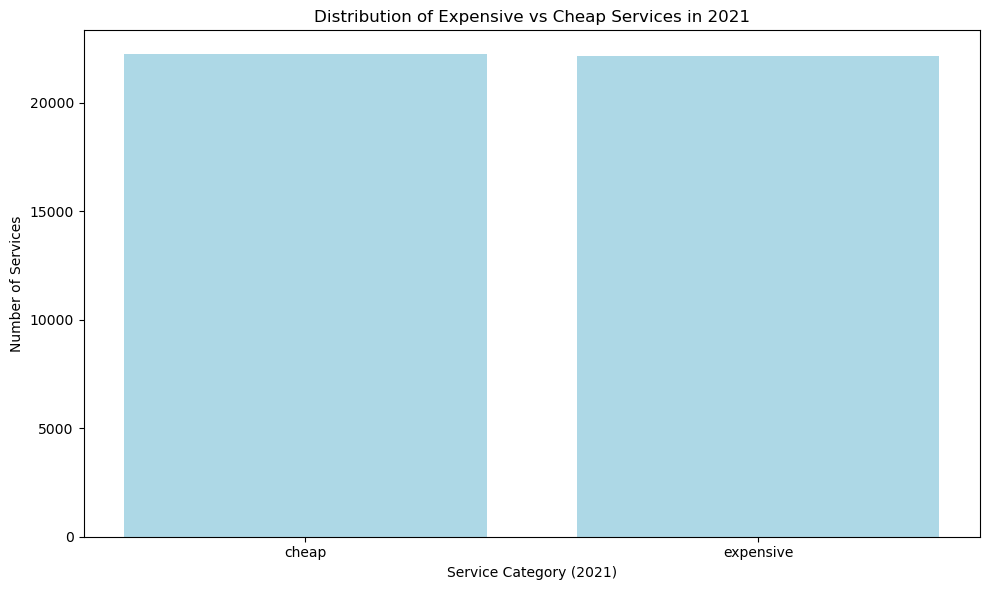

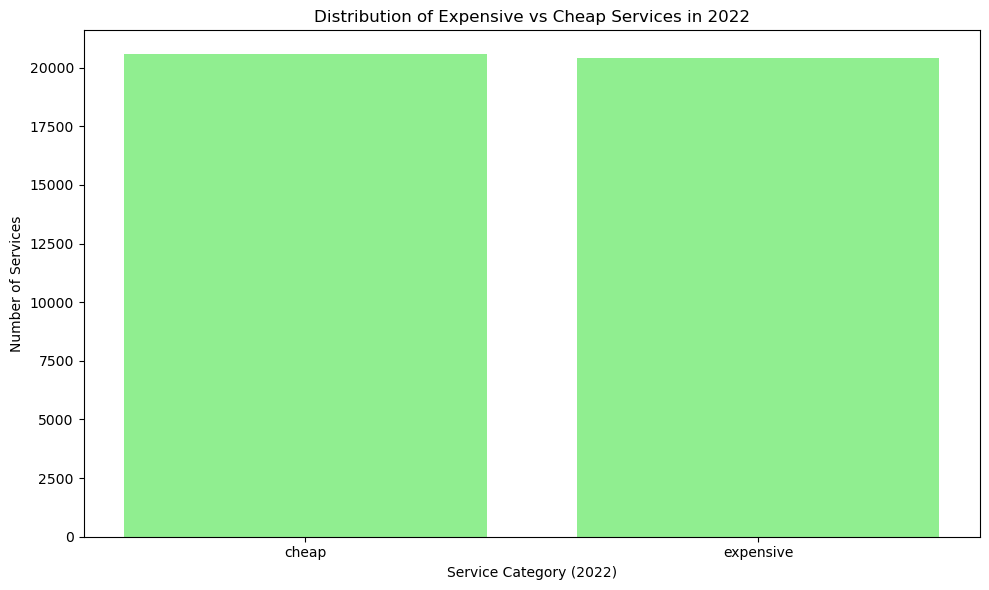

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(service_distribution_2021['service_category_2021'], service_distribution_2021['service_amount'], color='lightblue')
plt.xlabel('Service Category (2021)')
plt.ylabel('Number of Services')
plt.title('Distribution of Expensive vs Cheap Services in 2021')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(service_distribution_2022['service_category_2022'], service_distribution_2022['service_amount'], color='lightgreen')
plt.xlabel('Service Category (2022)')
plt.ylabel('Number of Services')
plt.title('Distribution of Expensive vs Cheap Services in 2022')
plt.tight_layout()
plt.show()

- Количество услуг, как дорогих, так и дешевых, в 2021 и 2022 годах остаётся почти на одном уровне. Это указывает на стабильность в количестве предоставленных услуг за оба года.

**Можно опровергнуть четвертую  гипотезу.**



**A fouth hypothesis can be refuted.**